In [12]:
!pip install fastbook
from fastbook import *
from fastai.vision.all import *

In [13]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'http://webneel.com/daily/sites/default/files/images/daily/08-2013/5-beautiful-bird-photography-by-hennie.jpg')

In [14]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

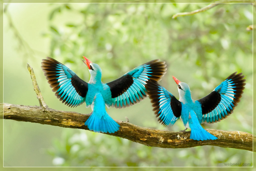

In [15]:
im = Image.open(dest)
im.to_thumb(256,256)

In [16]:
searches = 'forest', 'bird'
path = Path('bird_or_not')
# print(searches)
# print(path)
print(path.exists())
if not path.exists():
  print(searches)
  path.mkdir(exist_ok=False)
  for o in searches:
    dest = (path/o)
    print(dest)
    dest.mkdir(exist_ok=False)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

True


bird_or_not


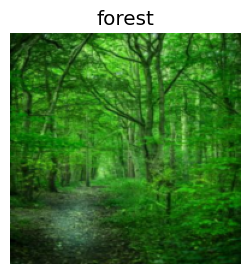

In [40]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
print(path)


dls.show_batch(max_n=1)